In [3]:
import math
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# DESCRIPTION DU DATASET

## Caractéristiques

### ETF (exchange-traded fund : Un ETF est un panier de titres dont les actions sont vendues en bourse.) Or :
- Date, Ouvert, Haut, Bas, Clôture et Volume.

###  Indice S&P 500 (un indice boursier basé sur 500 grandes sociétés cotées sur les bourses aux États-Unis) :
- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume'

###  Indice Dow Jones (un indice de référence largement surveillé aux États-Unis pour les actions de premier ordre) :
- 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume'

###  Eldorado Gold Corporation (EGO) (possède et exploite des mines d'or dans le monde entier. :
- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'

###  Taux de change EURO - USD (est le coût de cette devise par rapport à une autre.) :
- 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend'

###  Contrats à terme (constitue un engagement d'acheter (pour l'acheteur), de vendre (pour le vendeur) un actif sous-jacent à un prix fixé dès aujourd'hui mais pour une livraison et un règlement à une date future.) sur le pétrole brut Brent :
- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'

###  Pétrole brut WTI USD (Le West Texas Intermediate (WTI), est un type de pétrole brut utilisé comme standard dans la fixation du prix du brut et comme matière première pour les contrats à terme sur le pétrole auprès du New York Mercantile Exchange (bourse des matières premières) : 
- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'

###  Contrats à terme sur l'argent :
- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'

###  Taux des obligations américaines(Les obligations sont des titres de créance négociables, utilisés par les entreprises ou les Etats pour emprunter de l’argent sur les marchés financiers.) (10 ans) :
- 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend'

###  Prix du platine :
- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend'

###  Prix du palladium :
- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Trend'

###  Prix du Rhodium :
- 'RHO_PRICE'

###  Indice du dollar américain (une mesure de la valeur du dollar américain par rapport à la valeur d'un panier de devises de la majorité des principaux partenaires commerciaux des États-Unis.): 
- 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low', 'USDI_Volume', 'USDI_Trend'

###  ETF (exchange-traded fund : des actions de sociétés minières d'or.) des mineurs d'or :
- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume'

###  Pétrole ETF USO (un produit négocié en bourse (ETP) qui cherche à fournir des résultats d'investissement correspondant aux mouvements de prix quotidiens du pétrole brut léger non corrosif West Texas Intermediate (WTI).) :
- 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'

In [4]:
pd.set_option('display.max_column', 111)
data = pd.read_csv('Gold.csv')
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low    SP_close  SP_Ajclose  \
0  21521900  123.029999  123.199997  121.989998  122.180000  105.441238   
1  18124300  122.230003  122.949997  121.300003  121.589996  105.597549   
2  12547200  122.059998  122.320000  120.029999  120.290001  104.468536   
3   9136300  122.180000  124.139999  120.370003  123.930000  107.629784   
4  11996100  123.930000  124.360001  122.750000  124.169998  107.838242   

   SP_volume      DJ_open      DJ_high       DJ_low     DJ_close   DJ_Ajclose  \
0  199109200  11825.29004  11967.83984  11825.21973  11868.80957  11868.80957   
1  220481400  11870.25000  11968.17969  11819.30957  11866.38965  11866.38965   
2  183903000  11866.54004  11925.87988  11735.19043  11766.25977  11766.25977   
3  225418100  11769.20996  12117.12988  11768.83008  12103.58008  12103.58008   
4  194230900  12103.58008  12119.70020  11999.44043  12107.74023  12107.74023   

   DJ_volume    EG_open    EG_high     EG_low   EG_close  EG_Ajclose  \
0  136930000  74.550003  76.150002  72.150002  72.900002   70.431755   
1  389520000  73.599998  75.099998  73.349998  74.900002   72.364037   
2  135170000  69.099998  69.800003  64.199997  64.699997   62.509384   
3  165180000  66.449997  68.099998  66.000000  67.000000   64.731514   
4  163250000  67.099998  69.400002  66.900002  68.500000   66.180725   

   EG_volume  EU_Price  EU_open  EU_high  EU_low  EU_Trend  OF_Price  OF_Open  \
0     787900    1.3018   1.2982   1.3051  1.2957         1    105.09   104.88   
1     896600    1.3035   1.3020   1.3087  1.2997         1    103.35   103.51   
2    2096700    1.2995   1.3043   1.3044  1.2981         0    103.64   103.63   
3     875300    1.3079   1.3003   1.3133  1.2994         1    106.73   104.30   
4     837600    1.3045   1.3079   1.3197  1.3024         0    107.71   107.15   

   OF_High  OF_Low  OF_Volume  OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  \
0   106.50  104.88      14330         1     93.42    94.91    96.00   93.33   
1   104.56  102.46     140080         0     93.79    93.43    94.80   92.53   
2   104.57  102.37     147880         1     94.09    93.77    94.43   92.55   
3   107.27  103.91     170240         1     95.55    96.39    99.70   96.39   
4   108.17  106.16     145090         1     99.01    97.54    99.26   96.81   

   OS_Trend  SF_Price  SF_Open  SF_High  SF_Low  SF_Volume  SF_Trend  \
0         0     53604    54248    54248   52316     119440         1   
1         1     53458    53650    54030   52890      65390         0   
2         1     52961    53400    53400   52544      67280         0   
3         1     53487    52795    53575   52595      55130         1   
4         1     53148    53519    54184   52937      75950         0   

   USB_Price  USB_Open  USB_High  USB_Low  USB_Trend  PLT_Price  PLT_Open  \
0      1.911     1.911     1.911    1.911          1    1414.65   1420.30   
1      1.851     1.851     1.851    1.851          0    1420.25   1414.75   
2      1.810     1.810     1.810    1.810          0    1411.10   1422.65   
3      1.927     1.927     1.927    1.927          1    1434.75   1408.95   
4      1.970     1.970     1.970    1.970          1    1429.05   1434.40   

   PLT_High  PLT_Low  PLT_Trend  PLD_Price  PLD_Open  PLD_High  PLD_Low  \
0   1423.35  1376.85          0     618.85    614.70    615.00   614.60   
1   1431.75  1400.70          1     623.65    622.60    623.45   622.30   
2   1427.60  1404.60          0     608.80    626.00    630.00   608.60   
3   1436.55  1408

# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données
- Développer une 1ere stratégie de modélisation

## Checklist

#### Analyse de Forme :
- **variable target** : Adj Close
- **lignes et colonnes** : 1718 et 81
- **types de variables** : qualitatives : 1 , quantitatives : 80
- **Analyse des valeurs manquantes** :
    - Aucune valeur manquante retrouvée
- **Signification des variables** :
    -  variables continues standardisées, asymétriques mojoritairement étalées à droite 
    
#### Analyse de Fond :

 **Visualisation de la target** : 
- A partir de 2006, il grimpe quasiment sans pause jusqu’à une apogée en août 2012 à 1380 euros l’once. On enregistre en 6 ans, une augmentation du cours de l’or vertigineuse de 245% !

- Nous pouvons voir que les prix de l'or sont devenus moins volatils depuis 2012. Vers la mi-2017, l'or semble être devenu moins volatil jusqu'à la fin de 2018.Si nous devions diviser les données de 2012-2013 et 2013-2018 et exécuter à travers notre modèle de régression linéaire, nous obtiendrions de meilleures performances à partir de l'ensemble de données 2013-2018 car les prix ont moins de variation quotidienne que le sous-ensemble 2012-2013. Le principal point à retenir ici est que la volatilité de l'or a diminué au fil du temps. Cependant, le prix de clôture ajustée a également diminué.

- On ne sait pas si cela deviendra une règle historique mais visiblement, l’or est un actif qui a des cycles de 6 années depuis le début du millénaire. En effet, pendant cette nouvelle période de 6 ans après le cours record de 2012, on note une correction d’environ 30% puis une stagnation. 

**Relation Variables / Target** :
    - Les variables Open, High et Low ont une évolution trés similaire à la target
    - 'GDX_Open', 'GDX_High', 'GDX_Low' sont les variables les plus importantes

In [44]:
df = data.copy()

In [8]:
df.shape

(1718, 81)

<AxesSubplot:ylabel='None'>

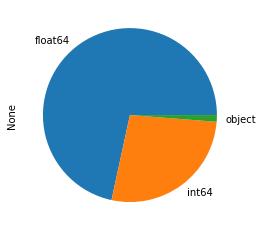

In [40]:
df.dtypes.value_counts().plot.pie()

In [37]:
pd.set_option('display.max_row', 81)
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
Volume             int64
SP_open          float64
SP_high          float64
SP_low           float64
SP_close         float64
SP_Ajclose       float64
SP_volume          int64
DJ_open          float64
DJ_high          float64
DJ_low           float64
DJ_close         float64
DJ_Ajclose       float64
DJ_volume          int64
EG_open          float64
EG_high          float64
EG_low           float64
EG_close         float64
EG_Ajclose       float64
EG_volume          int64
EU_Price         float64
EU_open          float64
EU_high          float64
EU_low           float64
EU_Trend           int64
OF_Price         float64
OF_Open          float64
OF_High          float64
OF_Low           float64
OF_Volume          int64
OF_Trend           int64
OS_Price         float64
OS_Open          float64
OS_High          float64
OS_Low           float64


In [41]:
df.dtypes.value_counts()

float64    58
int64      22
object      1
dtype: int64

In [15]:
df.isna().sum().values.any()

False

In [59]:
# df = df.drop('Close', axis = 1) 


## Visualisation des variables au cours du temps

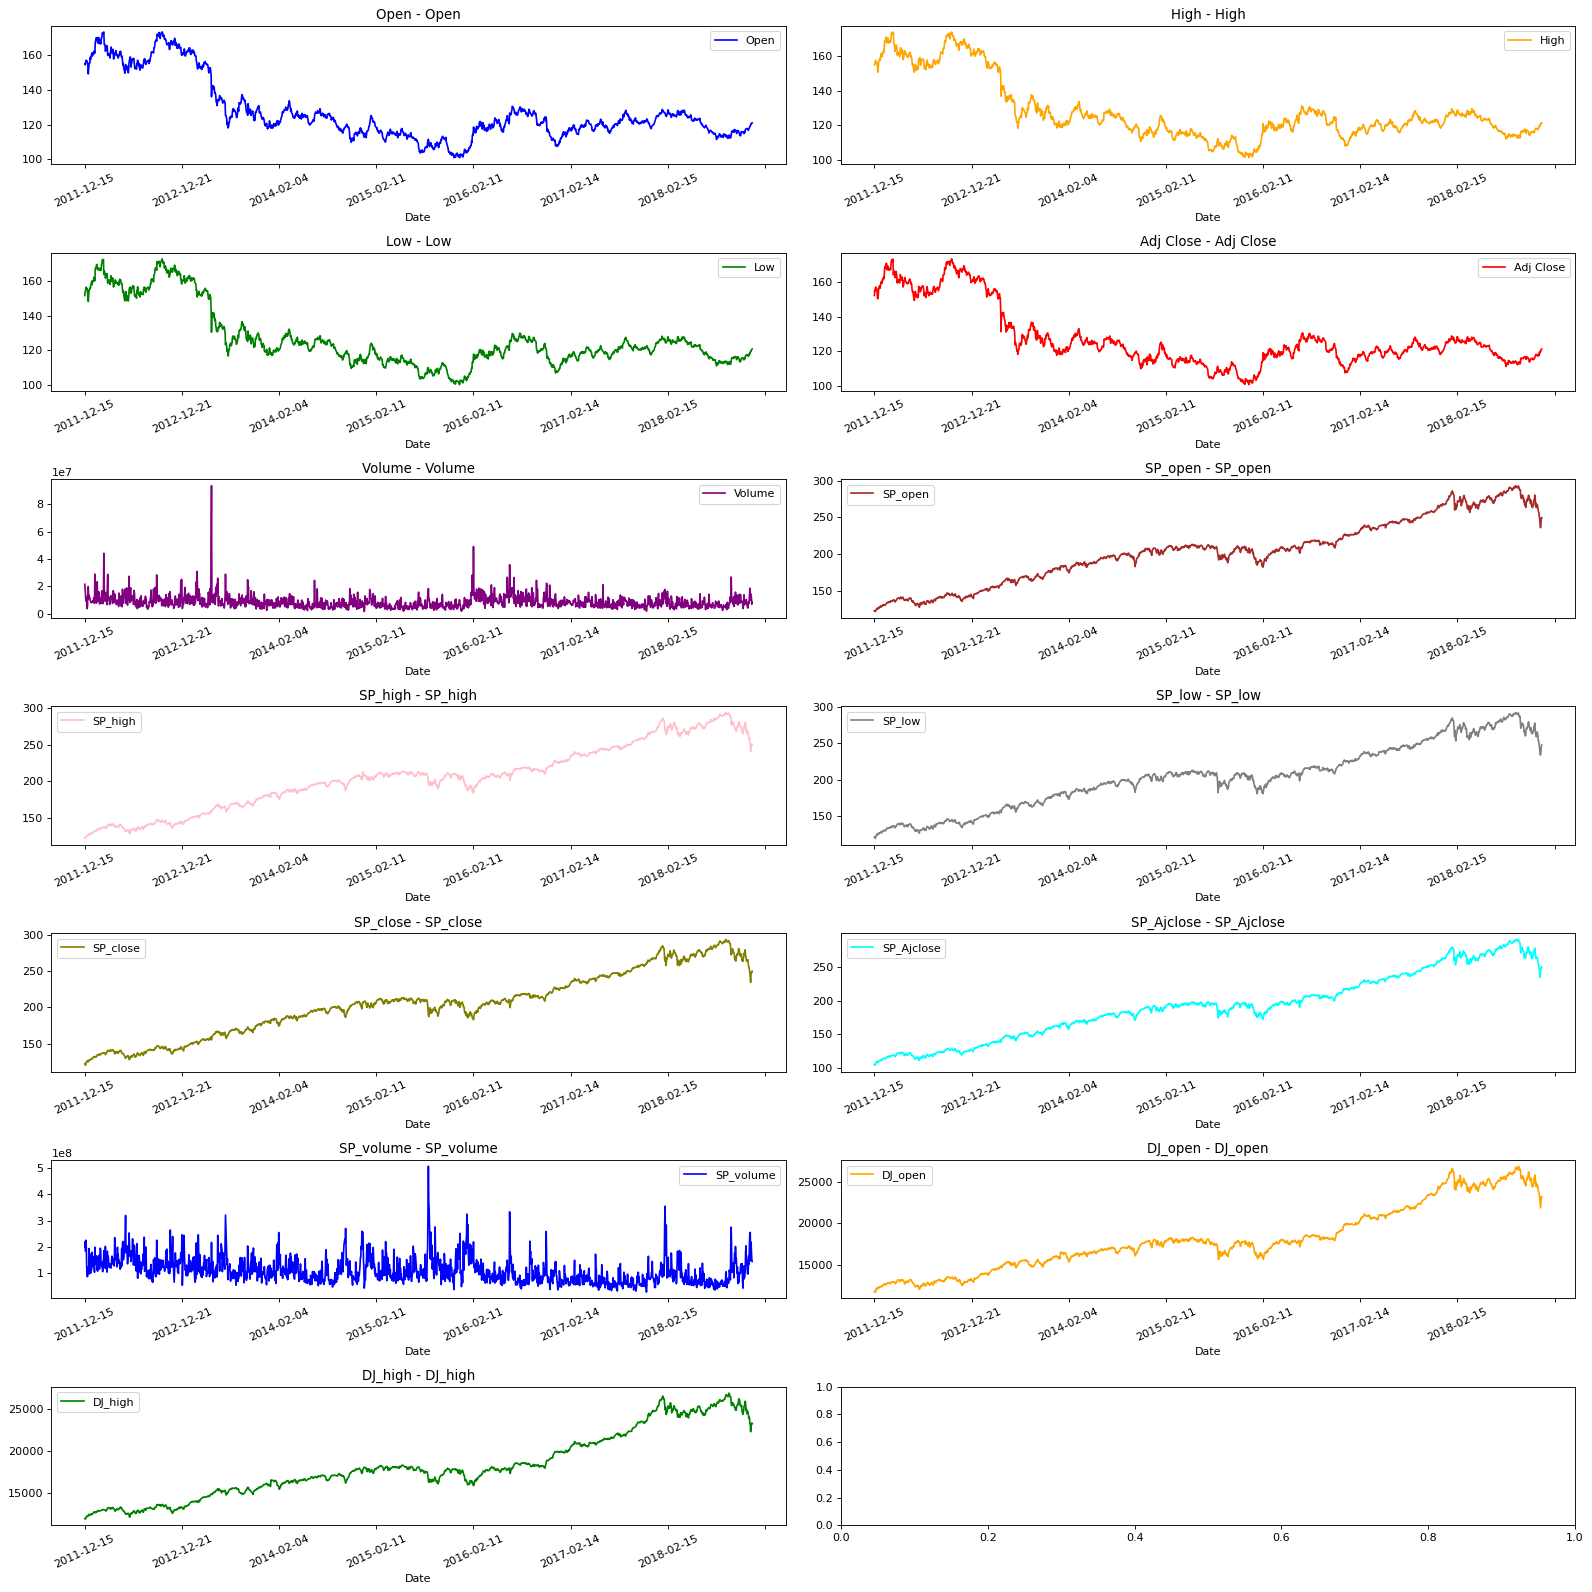

In [11]:
titles = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 
          'SP_Ajclose','SP_volume','DJ_open', 'DJ_high' ]
feature_keys = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close',
                'SP_Ajclose', 'SP_volume','DJ_open', 'DJ_high']

colors = [ "blue","orange","green","red","purple","brown","pink","gray","olive", "cyan"]

date_time_key = "Date"

def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(20, 20), dpi=80, facecolor="w", edgecolor="k")
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
        plt.tight_layout()


show_raw_visualization(df)

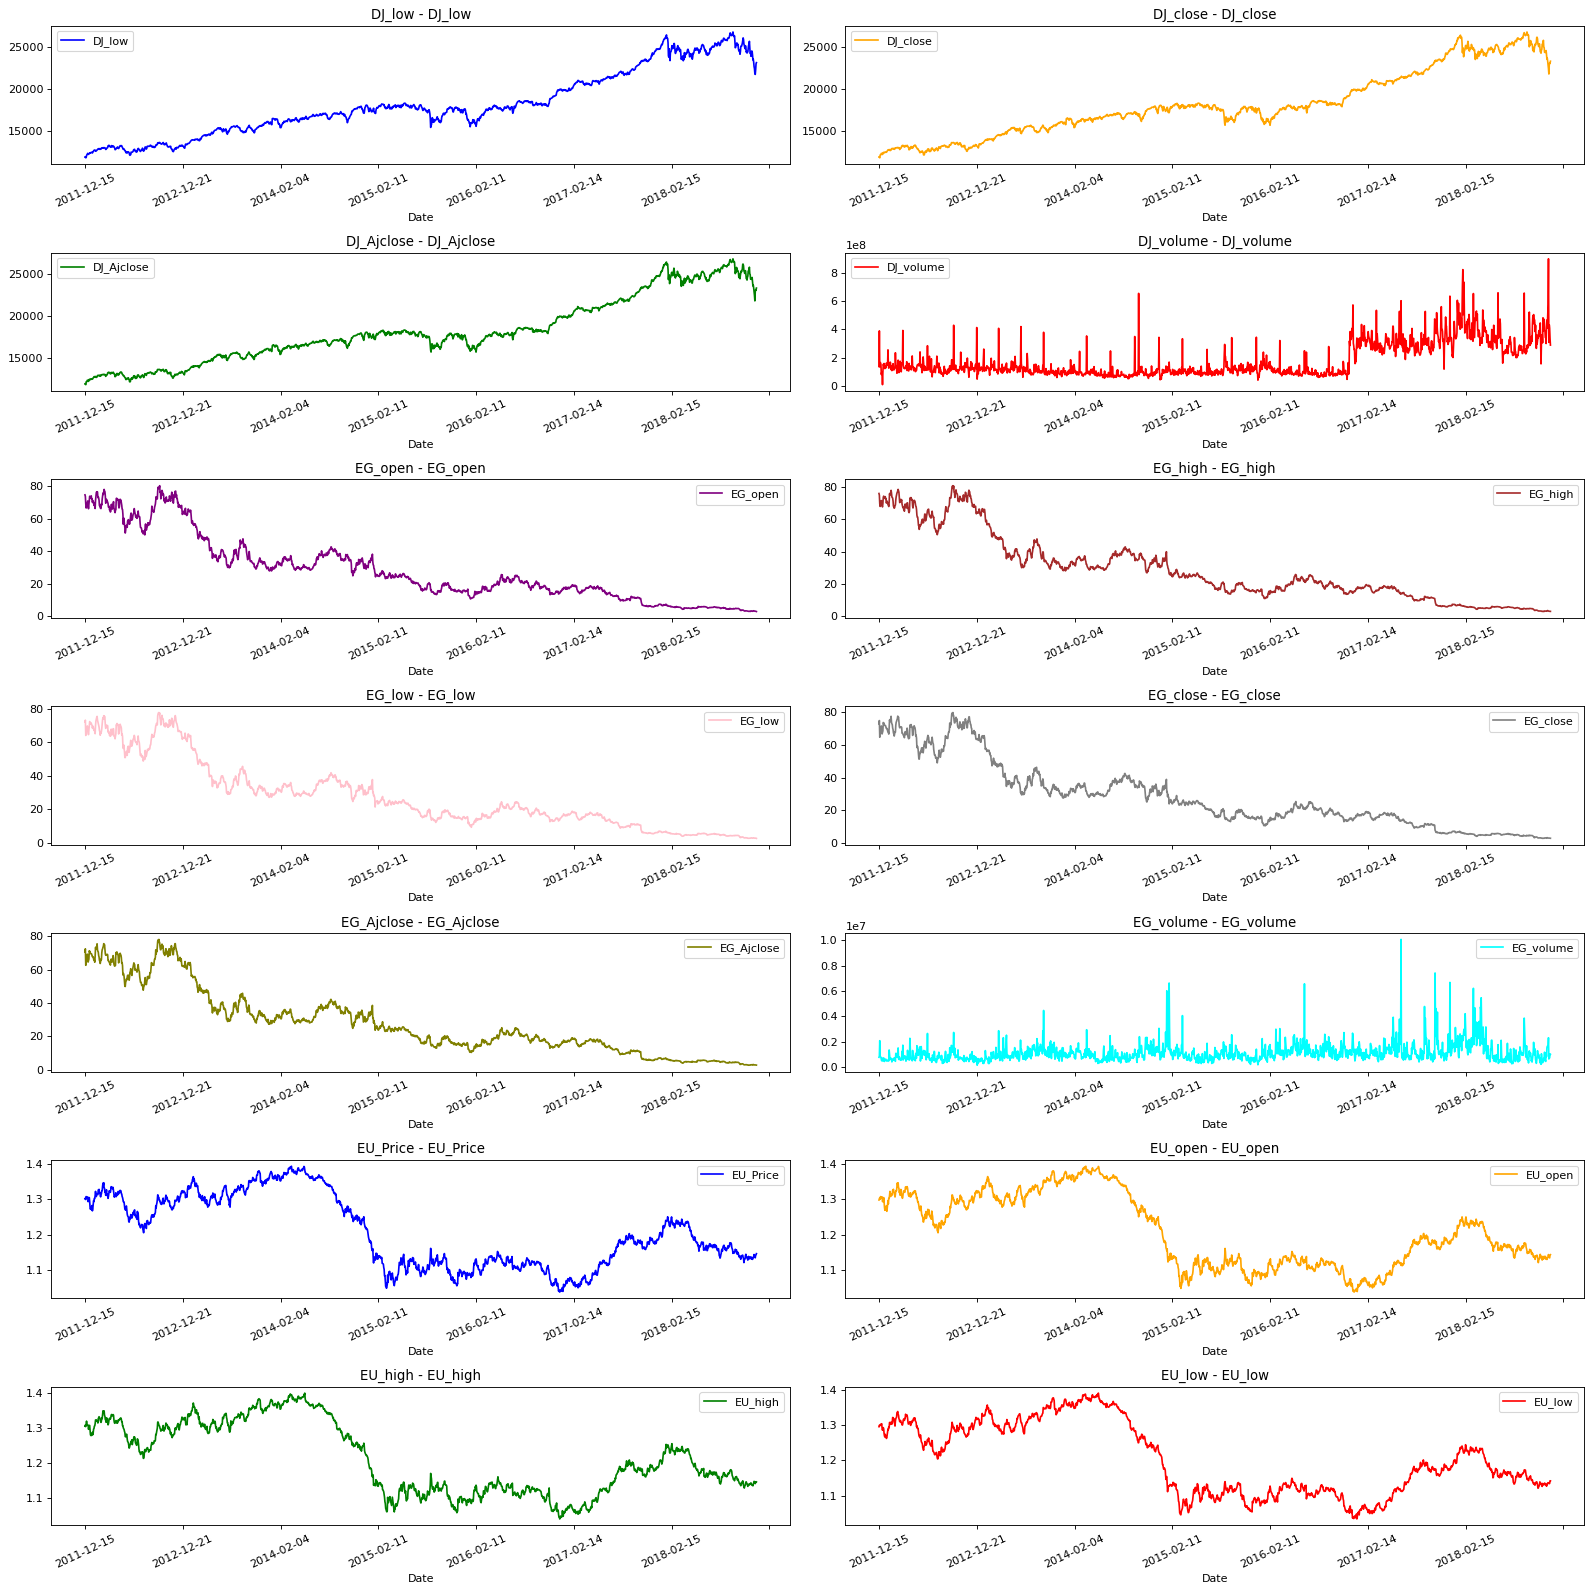

In [74]:
titles = ['DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low']
feature_keys = ['DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low']
show_raw_visualization(df)

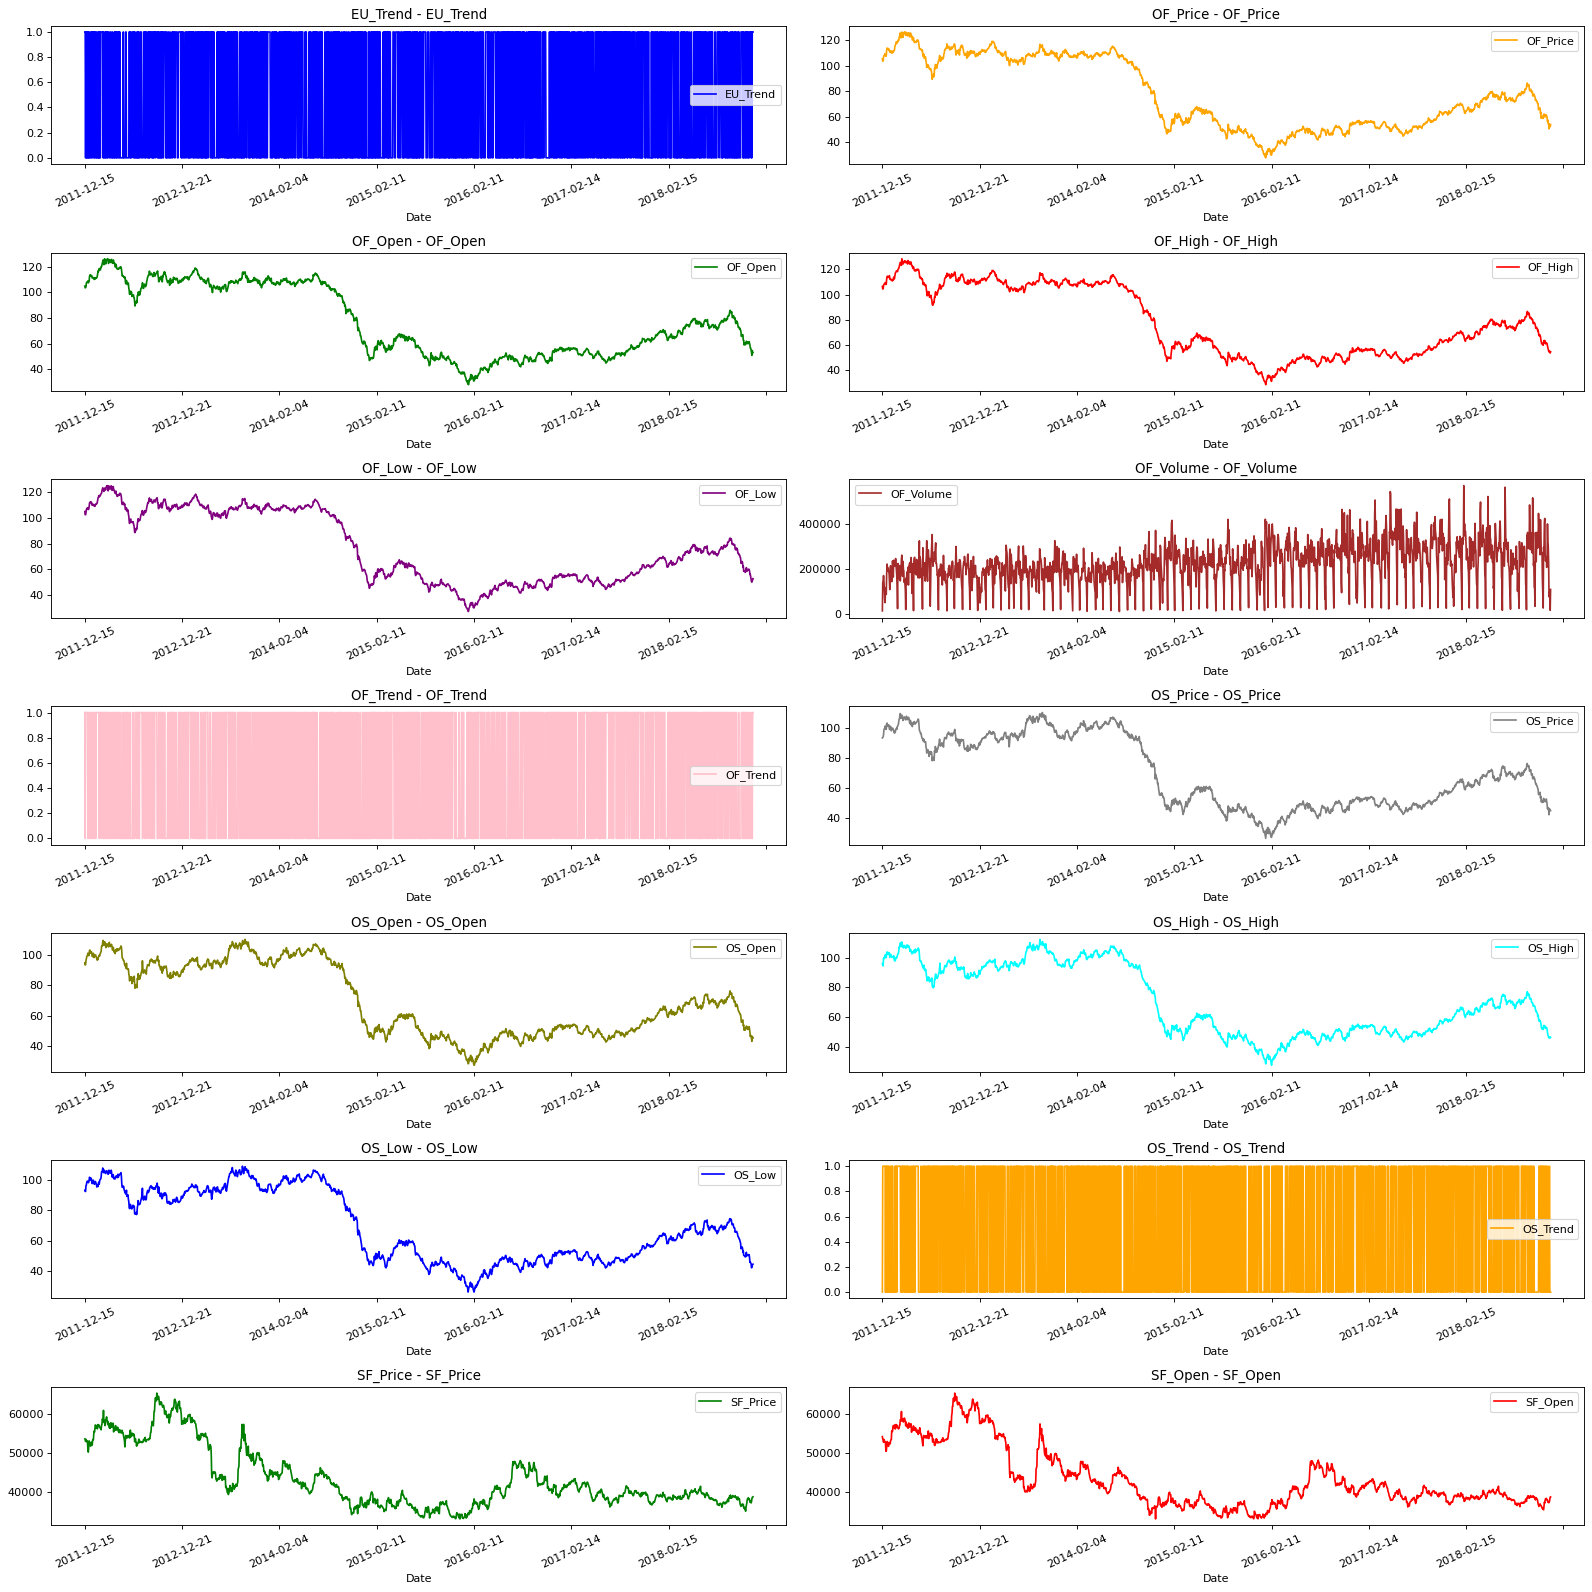

In [75]:
titles = ['EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open']
feature_keys = ['EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open']
show_raw_visualization(df)

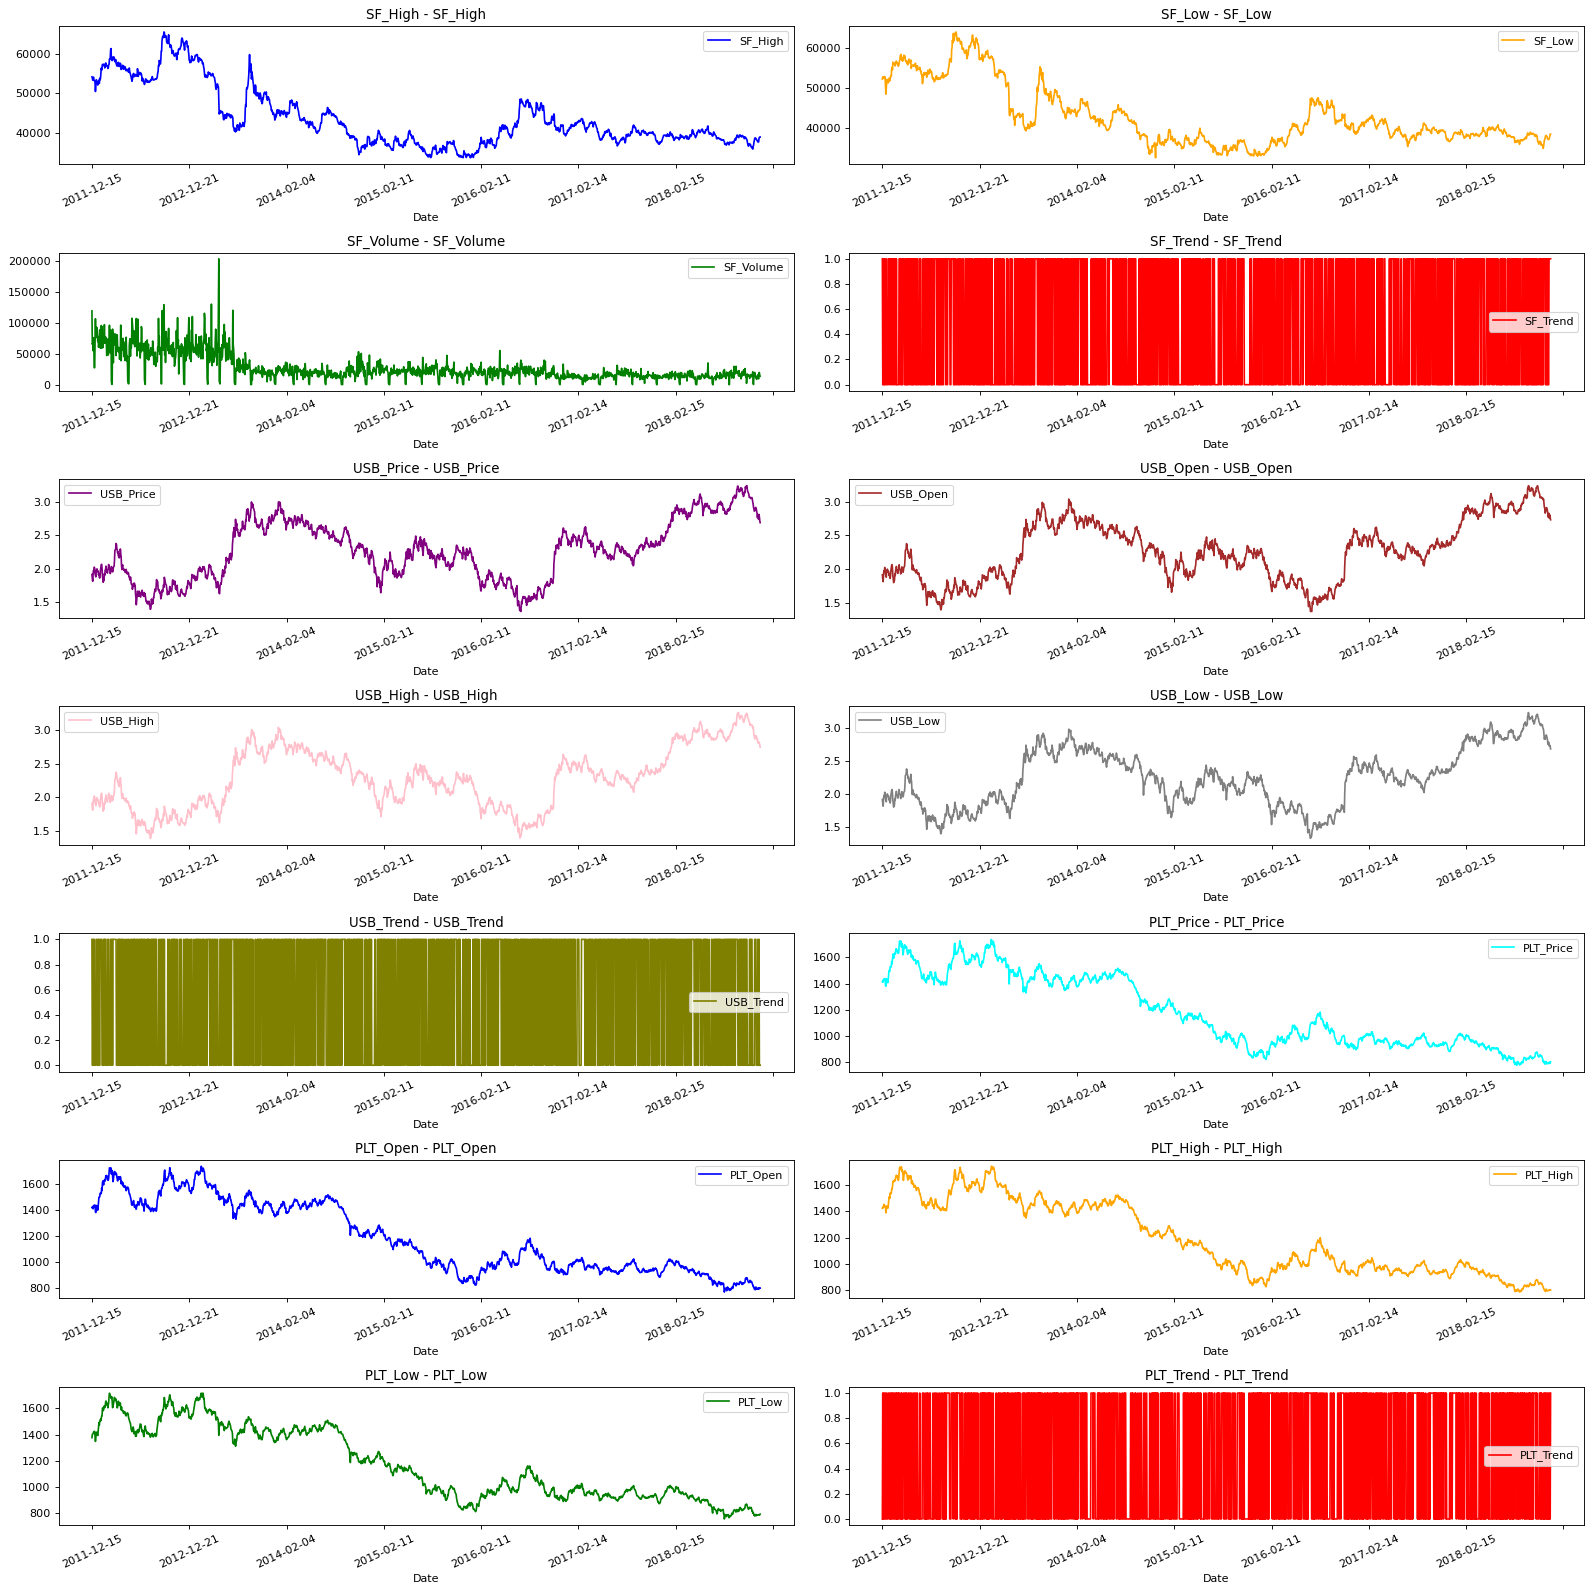

In [76]:
titles = ['SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend']
feature_keys = ['SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend']
show_raw_visualization(df)

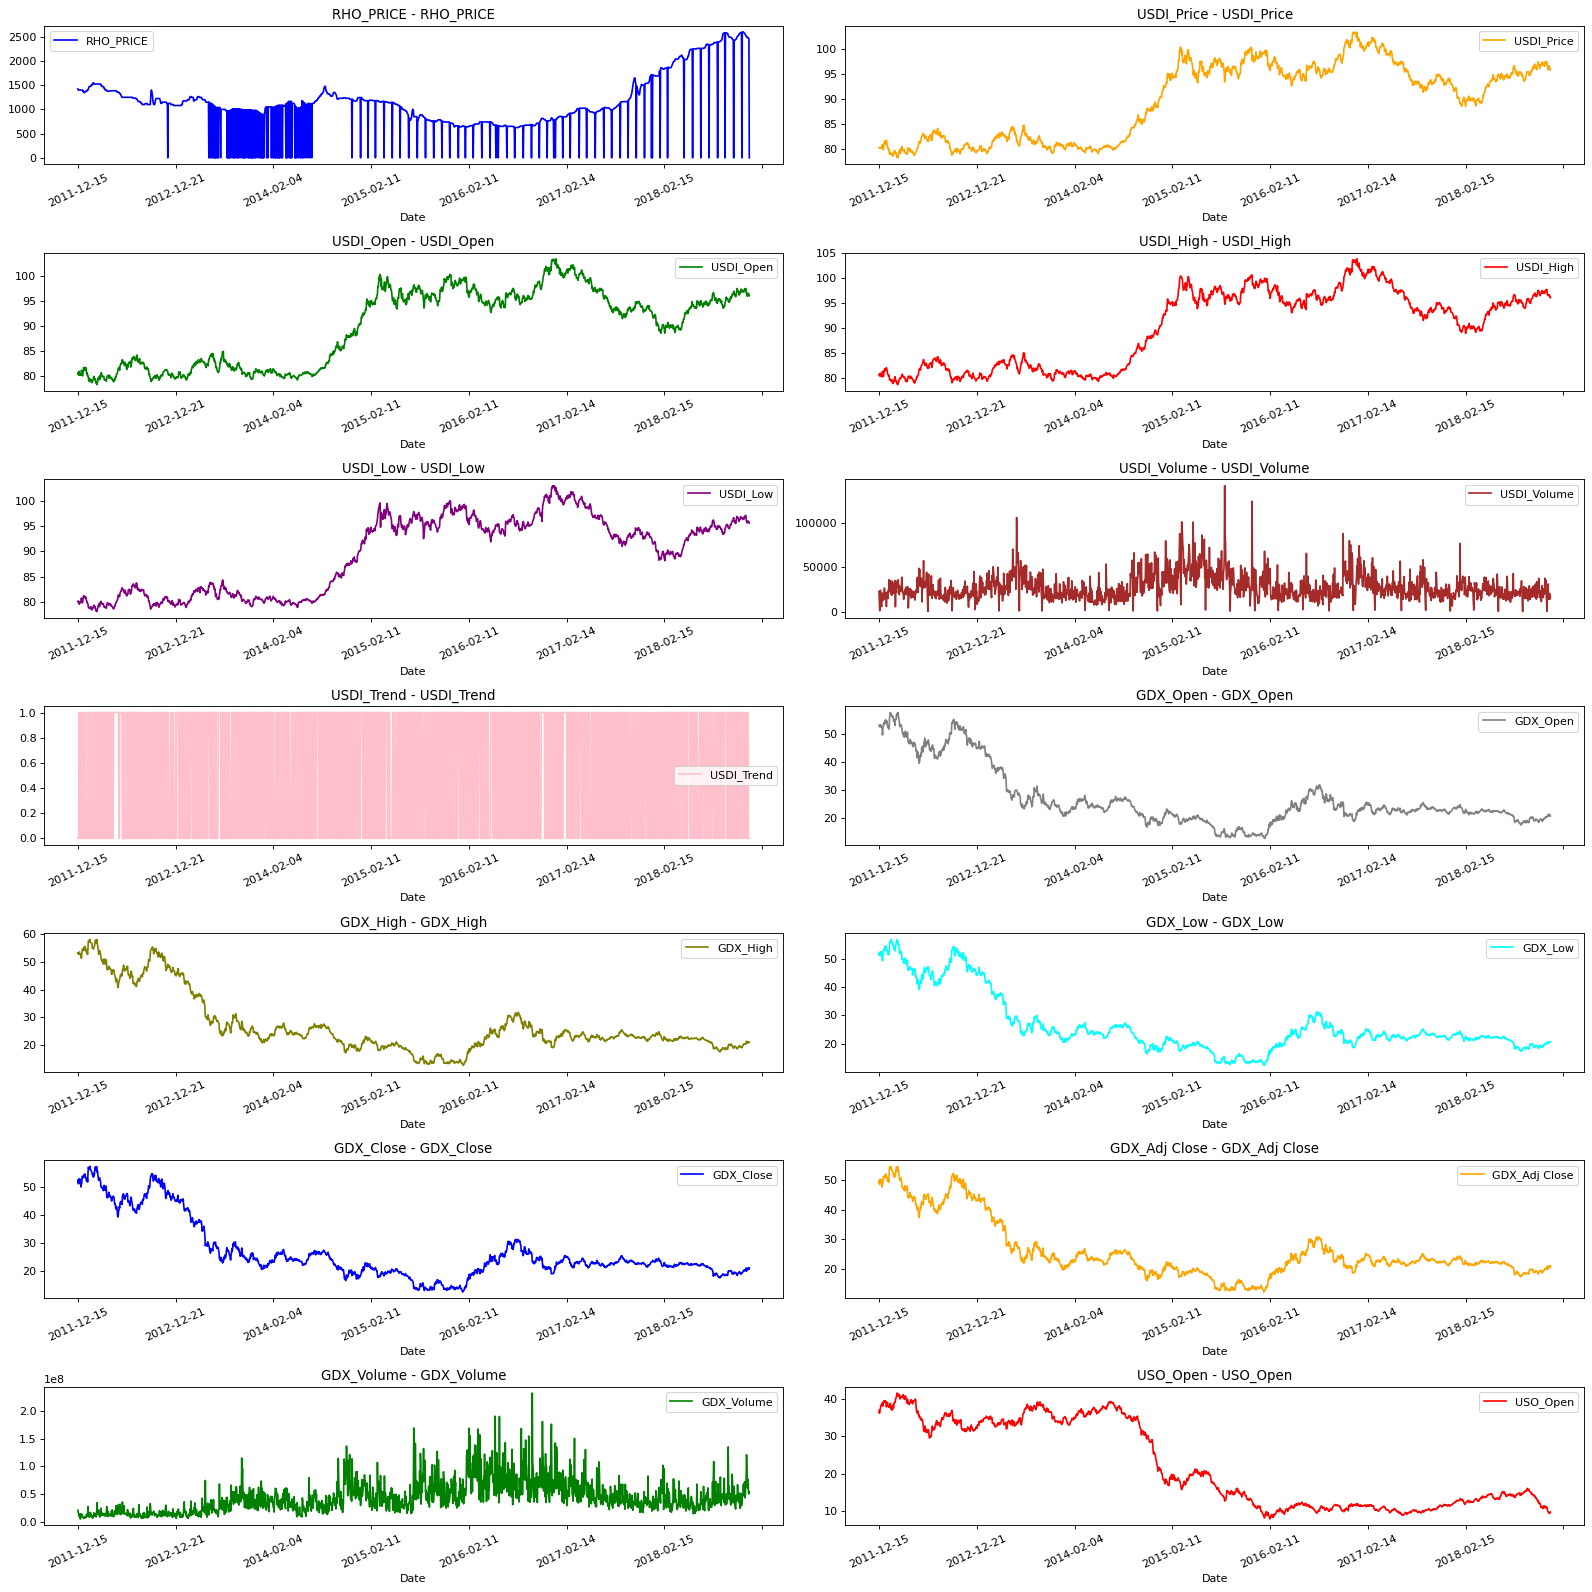

In [77]:
titles = ['RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       ]
feature_keys = ['RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       ]
show_raw_visualization(df)

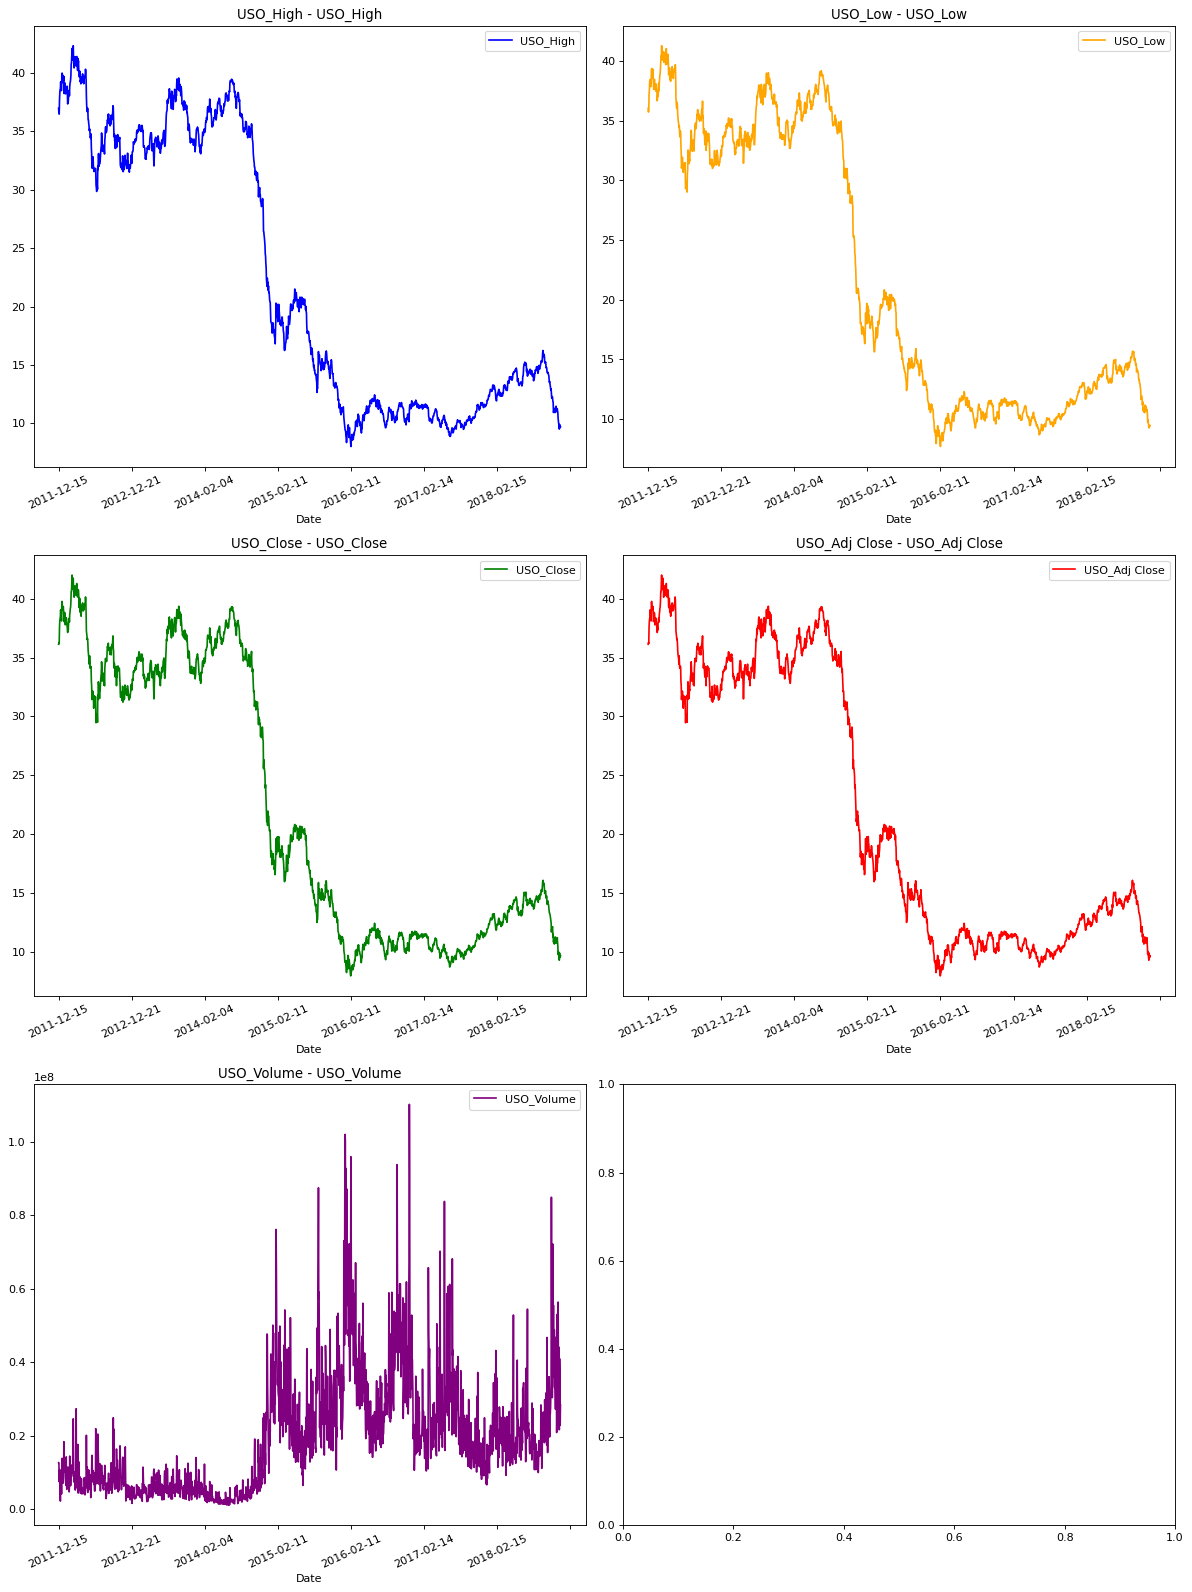

In [81]:
titles = ['USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']
feature_keys = ['USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']

def show_raw_visualization_small(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,)
        ax.legend([titles[i]])
    plt.tight_layout()

show_raw_visualization_small(df)

In [84]:
df = df.drop('Date', axis = 1) 

In [58]:
df.head()

Open        High         Low   Adj Close    Volume     SP_open  \
0  154.740005  154.949997  151.710007  152.330002  21521900  123.029999   
1  154.309998  155.369995  153.899994  155.229996  18124300  122.230003   
2  155.479996  155.860001  154.360001  154.869995  12547200  122.059998   
3  156.820007  157.429993  156.580002  156.979996   9136300  122.180000   
4  156.979996  157.529999  156.130005  157.160004  11996100  123.930000   

      SP_high      SP_low    SP_close  SP_Ajclose  SP_volume      DJ_open  \
0  123.199997  121.989998  122.180000  105.441238  199109200  11825.29004   
1  122.949997  121.300003  121.589996  105.597549  220481400  11870.25000   
2  122.320000  120.029999  120.290001  104.468536  183903000  11866.54004   
3  124.139999  120.370003  123.930000  107.629784  225418100  11769.20996   
4  124.360001  122.750000  124.169998  107.838242  194230900  12103.58008   

       DJ_high       DJ_low     DJ_close   DJ_Ajclose  DJ_volume    EG_open  \
0  11967.83984  11825.21973  11868.80957  11868.80957  136930000  74.550003   
1  11968.17969  11819.30957  11866.38965  11866.38965  389520000  73.599998   
2  11925.87988  11735.19043  11766.25977  11766.25977  135170000  69.099998   
3  12117.12988  11768.83008  12103.58008  12103.58008  165180000  66.449997   
4  12119.70020  11999.44043  12107.74023  12107.74023  163250000  67.099998   

     EG_high     EG_low   EG_close  EG_Ajclose  EG_volume  EU_Price  EU_open  \
0  76.150002  72.150002  72.900002   70.431755     787900    1.3018   1.2982   
1  75.099998  73.349998  74.900002   72.364037     896600    1.3035   1.3020   
2  69.800003  64.199997  64.699997   62.509384    2096700    1.2995   1.3043   
3  68.099998  66.000000  67.000000   64.731514     875300    1.3079   1.3003   
4  69.400002  66.900002  68.500000   66.180725     837600    1.3045   1.3079   

   EU_high  EU_low  EU_Trend  OF_Price  OF_Open  OF_High  OF_Low  OF_Volume  \
0   1.3051  1.2957         1    105.09   104.88   106.50  104.88      14330   
1   1.3087  1.2997         1    103.35   103.51   104.56  102.46     140080   
2   1.3044  1.2981         0    103.64   103.63   104.57  102.37     147880   
3   1.3133  1.2994         1    106.73   104.30   107.27  103.91     170240   
4   1.3197  1.3024         0    107.71   107.15   108.17  106.16     145090   

   OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  OS_Trend  SF_Price  SF_Open  \
0         1     93.42    94.91    96.00   93.33         0     53604    54248   
1         0     93.79    93.43    94.80   92.53         1     53458    53650   
2         1     94.09    93.77    94.43   92.55         1     52961    53400   
3         1     95.55    96.39    99.70   96.39         1     53487    52795   
4         1     99.01    97.54    99.26   96.81         1     53148    53519   

   SF_High  SF_Low  SF_Volume  SF_Trend  USB_Price  USB_Open  USB_High  \
0    54248   52316     119440         1      1.911     1.911     1.911   
1    54030   52890      65390         0      1.851     1.851     1.851   
2    53400   52544      67280         0      1.810     1.810     1.810   
3    53575   52595      55130         1      1.927     1.927     1.927   
4    54184   52937      75950         0      1.970     1.970     1.970   

   USB_Low  USB_Trend  PLT_Price  PLT_Open  PLT_High  PLT_Low  PLT_Trend  \
0    1.911          1    1414.65   1420.30   1423.35  1376.85          0   
1    1.851          0    1420.25   1414.75   1431.75  1400.70          1   
2    1.810          0    1411.10   1422.65   1427.60  1404.60          0   
3    1.927          1    1434.75   1408.95   1436.55  1408.15          1   
4    1.970          1    1429.05   1434.40   1453.75  1417.65          0   

   PLD_Price  PLD_Open  PLD_High  PLD_Low  PLD_Trend  RHO_PRICE  USDI_Price  \
0     618.85    614.70    615.00   614.60          1       1425      80.341   
1     623.65    622.60    623.45   622.30          1       1400      80.249   
2     608.80    626.00    630.00   608.60   

## Examen de la target

In [49]:
df['Adj Close'].value_counts()
# normalize = True mettre en pourcentage

115.779999    4
124.589996    4
116.769997    4
114.769997    4
122.209999    4
             ..
127.750000    1
120.669998    1
118.480003    1
154.770004    1
156.500000    1
Name: Adj Close, Length: 1384, dtype: int64

C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

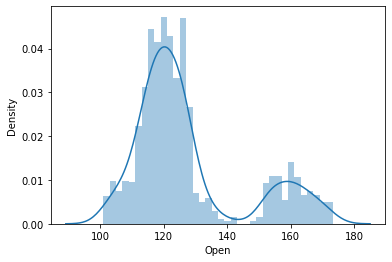

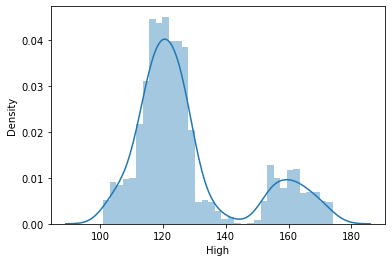

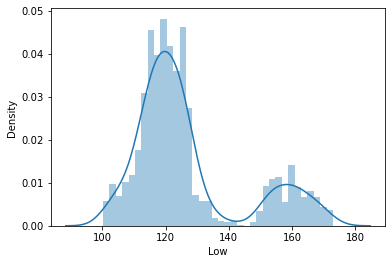

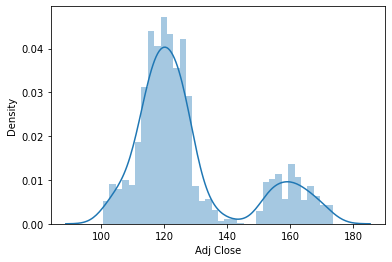

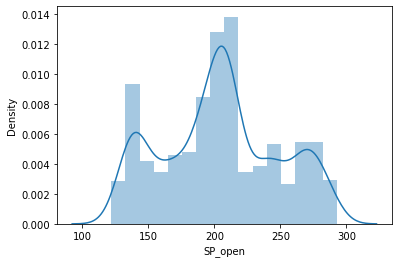

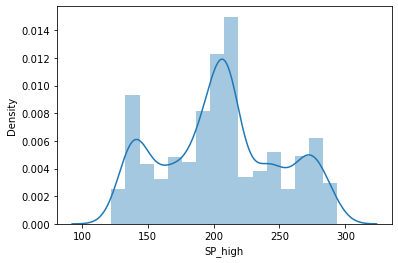

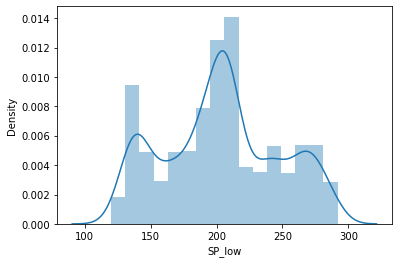

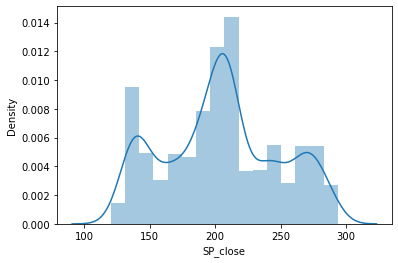

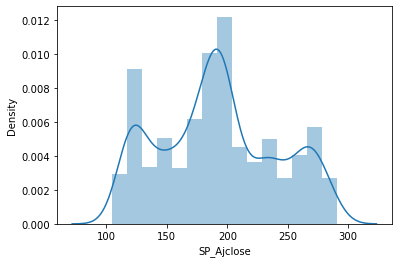

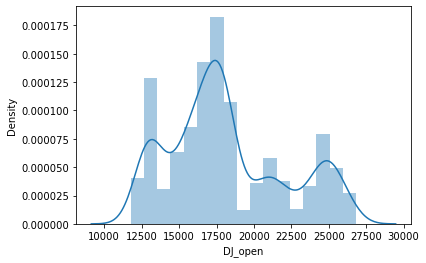

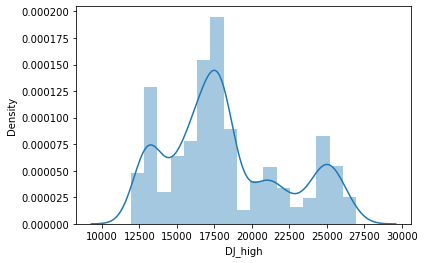

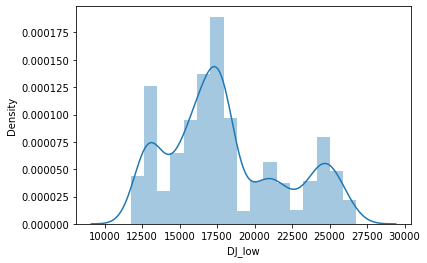

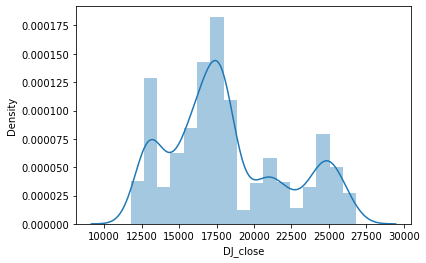

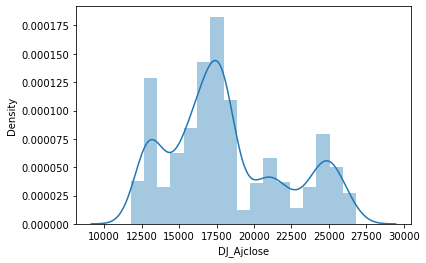

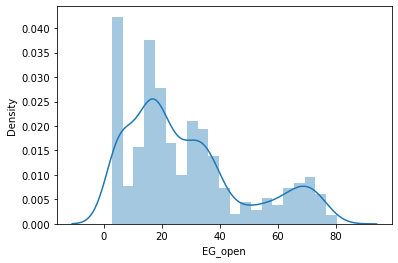

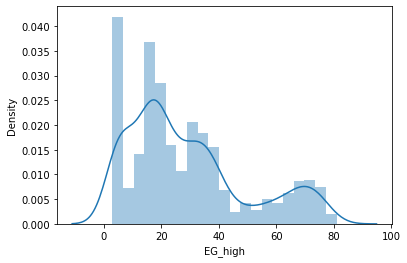

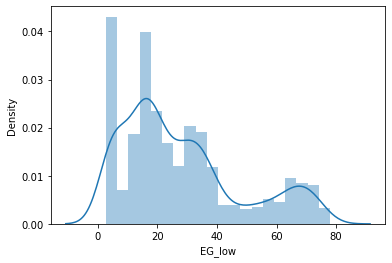

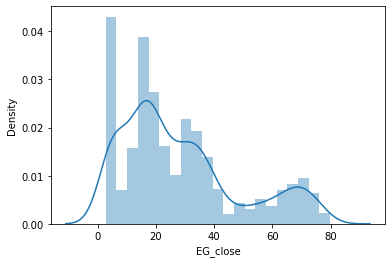

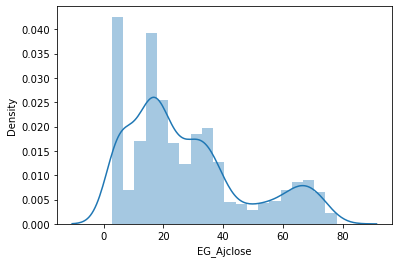

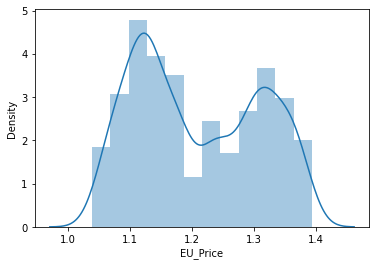

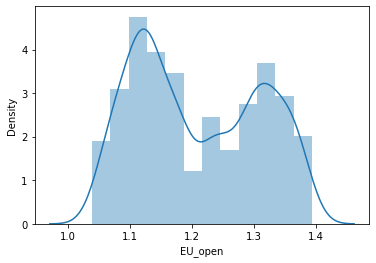

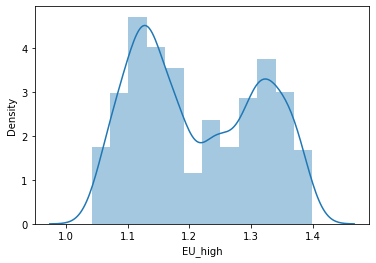

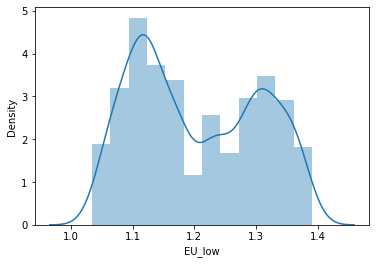

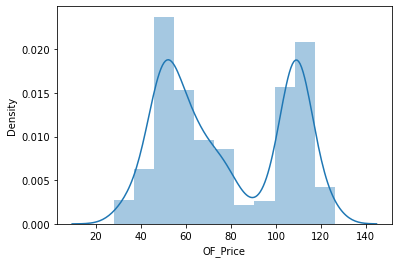

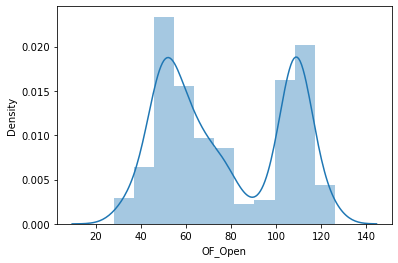

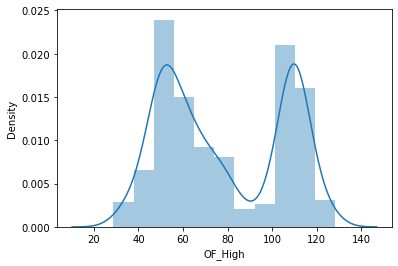

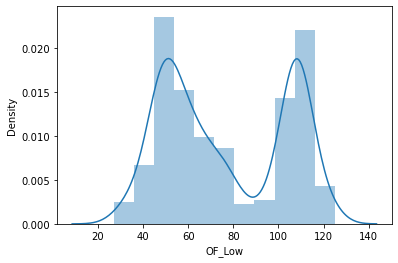

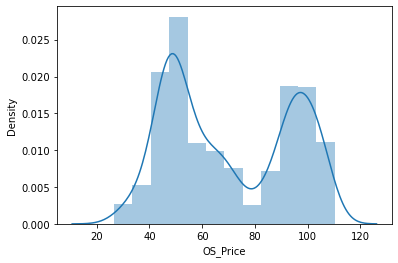

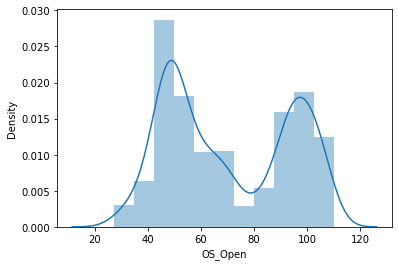

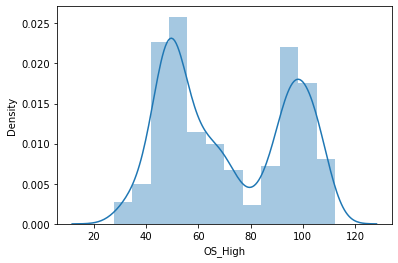

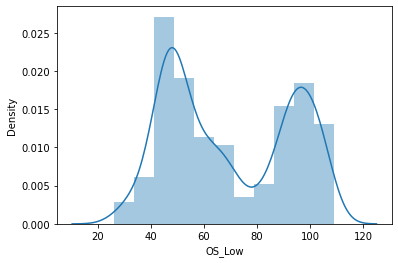

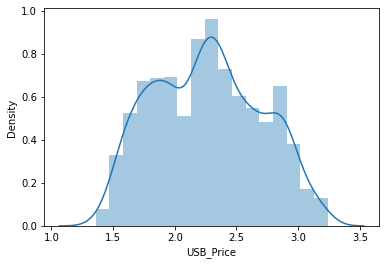

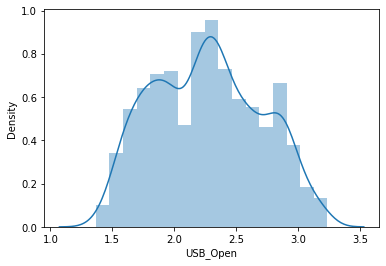

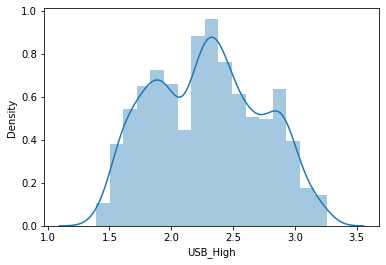

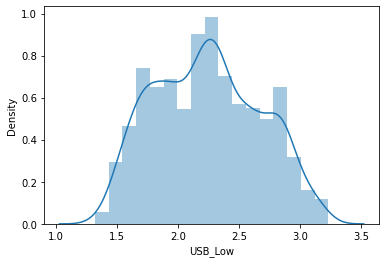

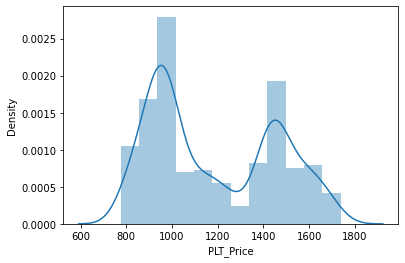

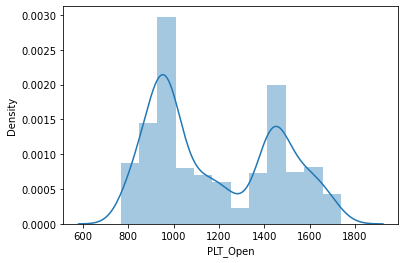

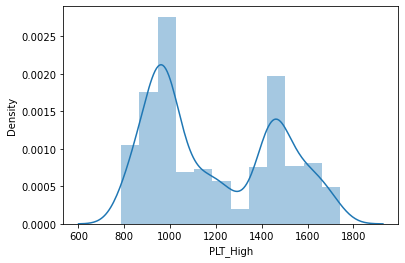

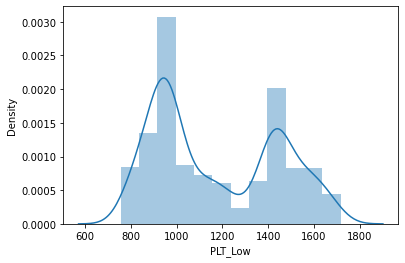

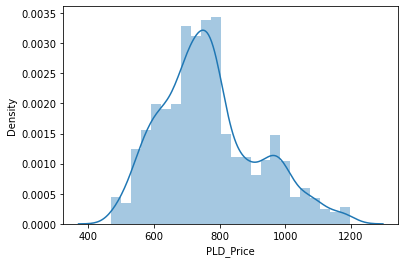

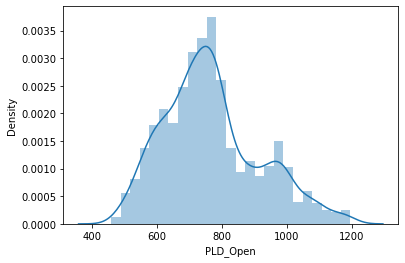

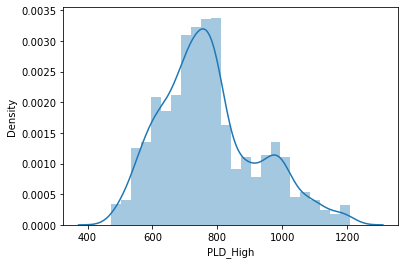

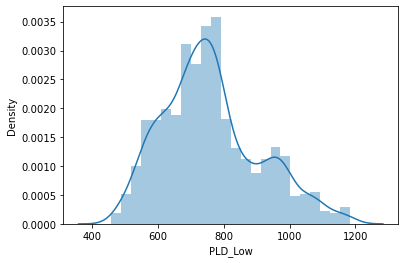

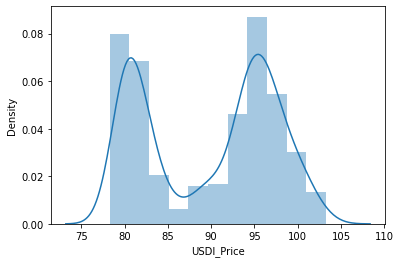

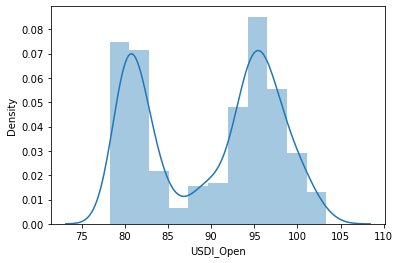

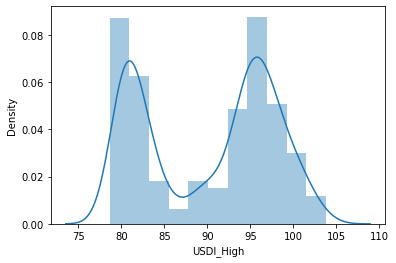

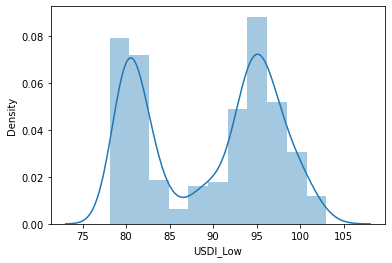

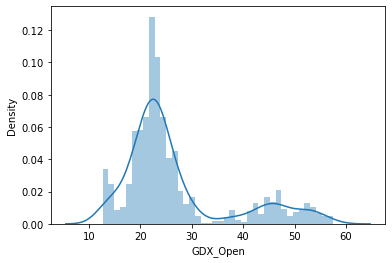

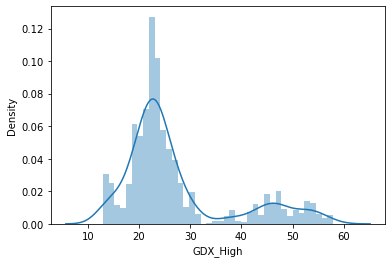

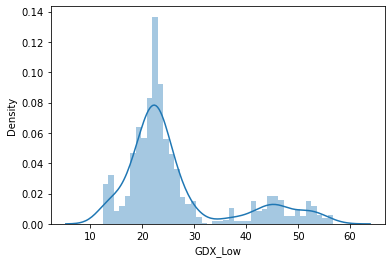

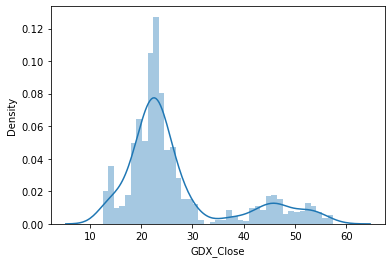

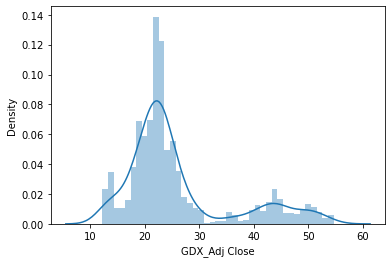

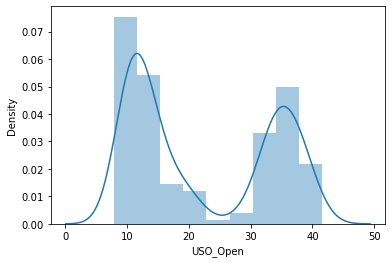

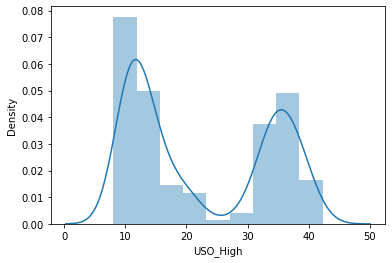

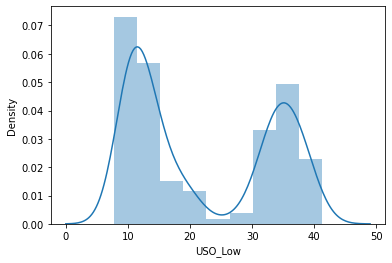

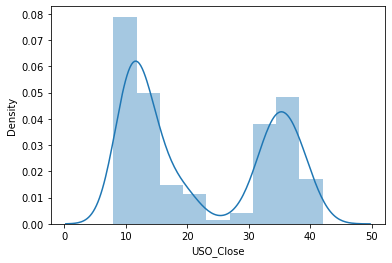

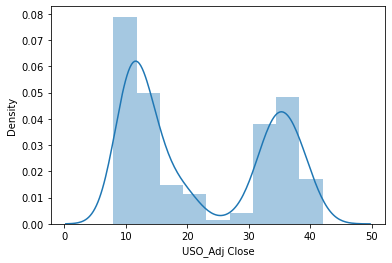

In [50]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

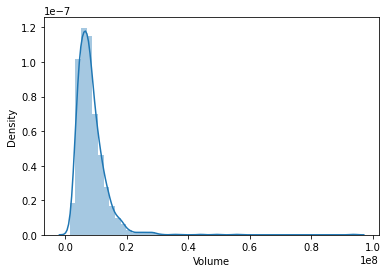

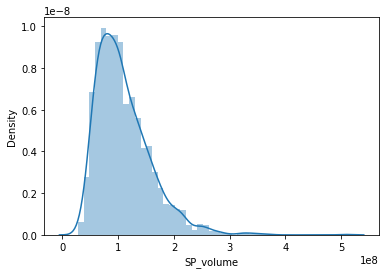

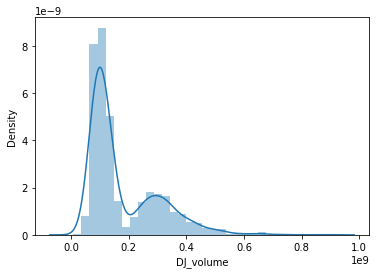

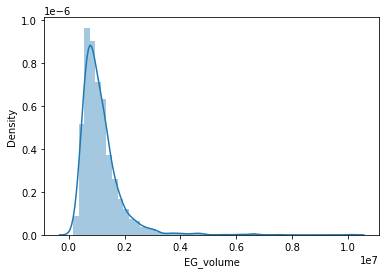

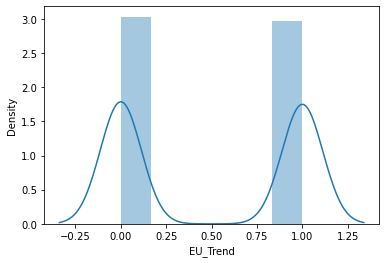

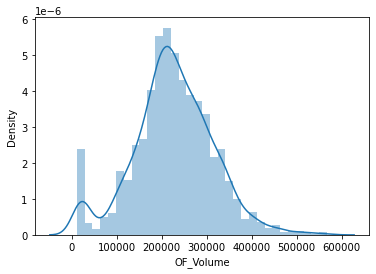

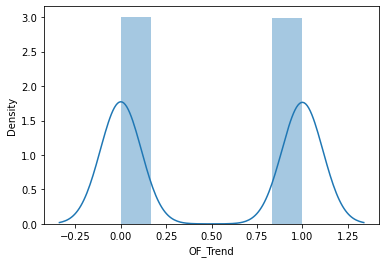

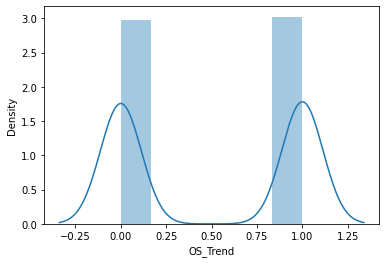

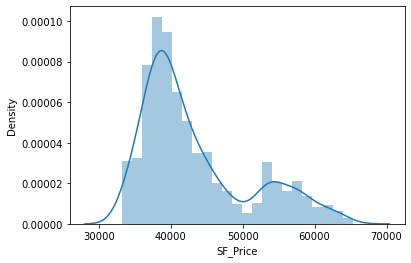

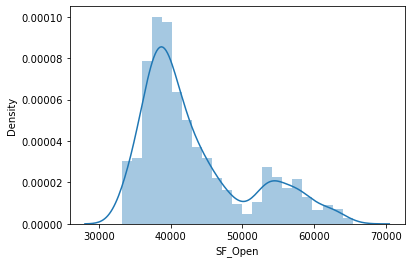

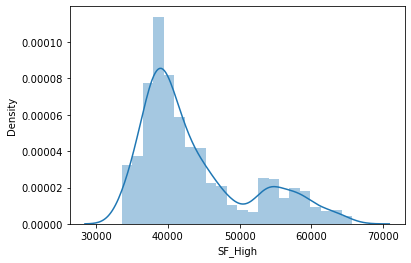

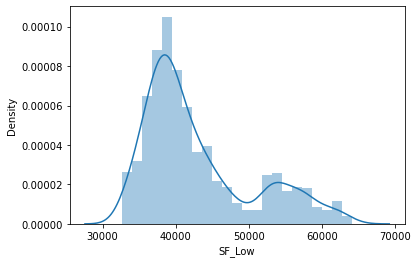

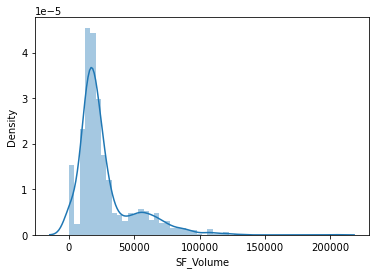

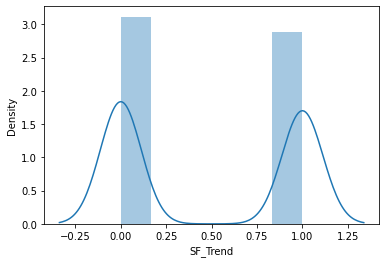

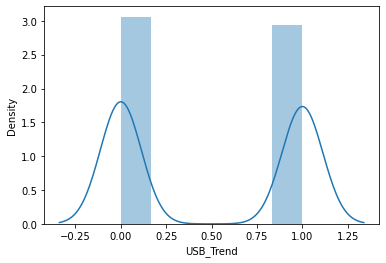

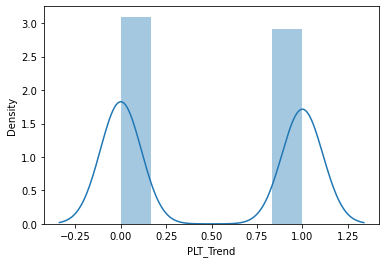

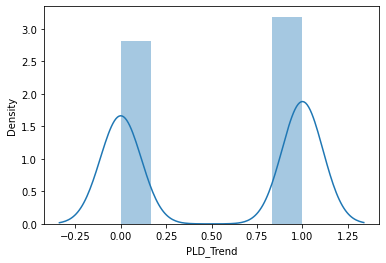

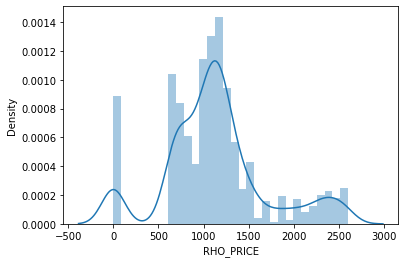

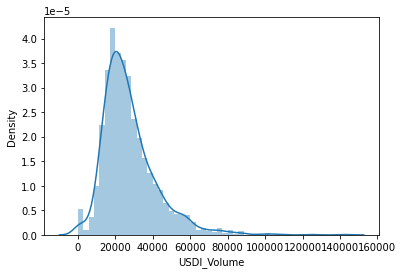

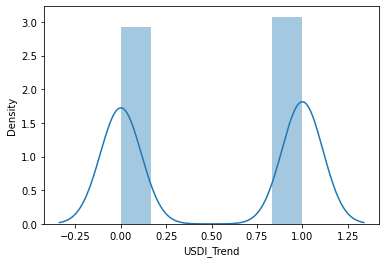

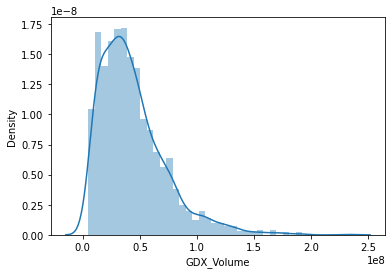

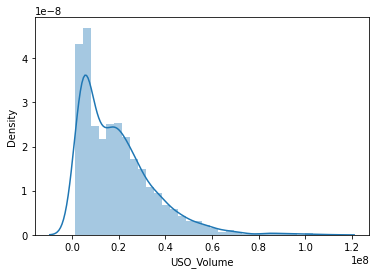

In [51]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

In [ ]:
plt.figure(figsize=(25,20)) 
sns.heatmap(df, annot=True) 

In [59]:
X = data.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Close, Length: 1718, dtype: float64

In [60]:
# Create mutual info scores

def make_mi_scores (X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

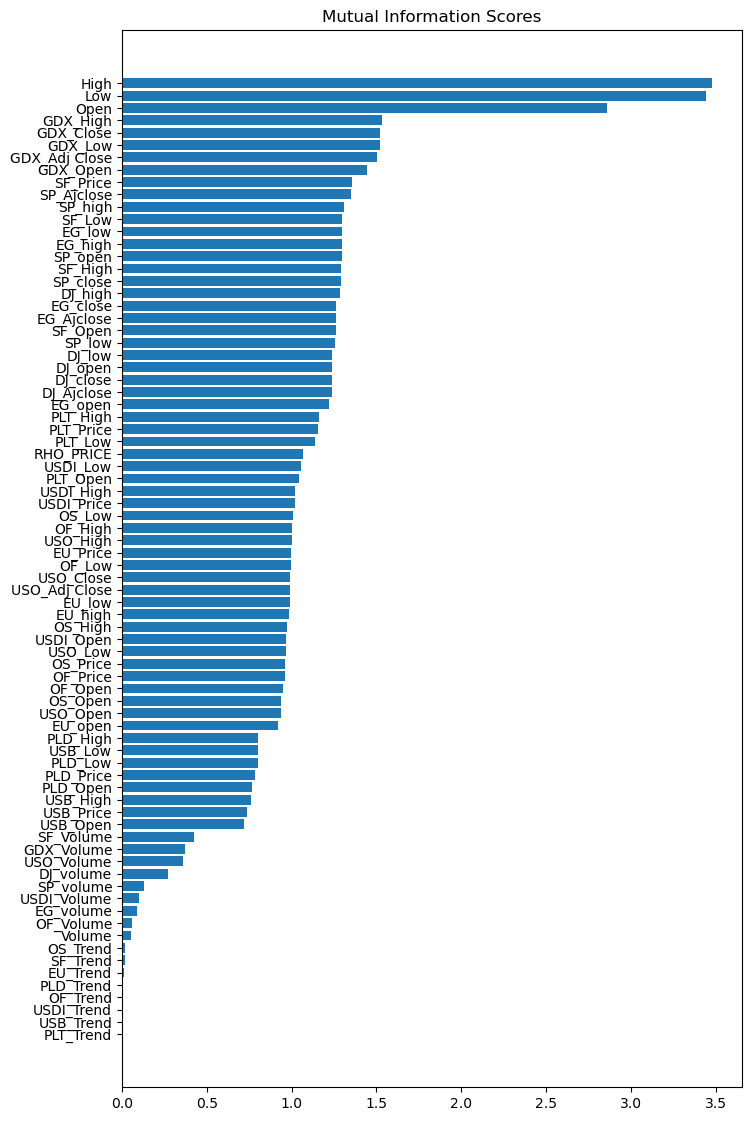

In [61]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(8,14))
plot_mi_scores(mi_scores)

## Mise en évidence des variables les plus importantes

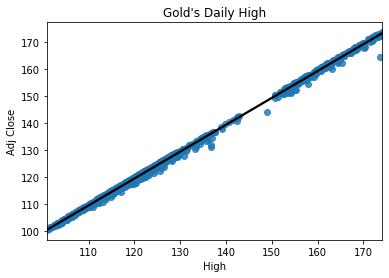

In [98]:
daily_high = sns.regplot(x="High", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily High")

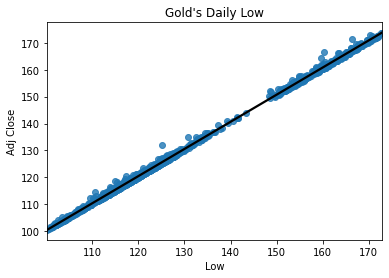

In [99]:
daily_low = sns.regplot(x="Low", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily Low")

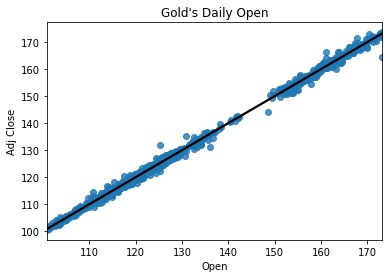

In [100]:
daily_close = sns.regplot(x="Open", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily Open")

Nous pouvons voir que ces trois caractéristiques sont de très bons prédicteurs du prix de clôture ajusté. Cependant, que se passe-t-il si nous pouvons créer une nouvelle fonctionnalité qui peut donner un peu plus d'informations sur le prix de l'or. nous allons créer une fonctionnalité appelée "changement quotidien" en prenant la différence de prix entre l'ouverture et la fermeture. Le changement quotidien est inutile en tant que prédicteur à lui seul, mais nous pouvons peut-être l'appliquer aux données de séries chronologiques pour voir les tendances. Le changement quotidien est un moyen de suivre la volatilité des prix de l'or.

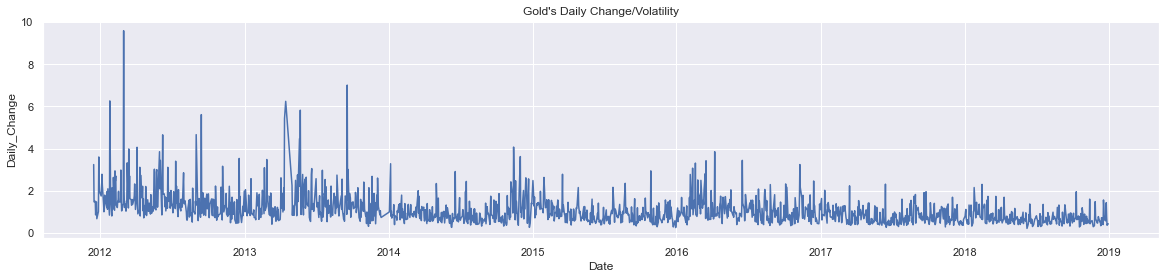

In [103]:
data["Daily_Change"] = abs(X.High - X.Low)

# Convert Date from string to datetime to give us yearly ticks on the X-axis
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Daily_Change", data=data).set(title="Gold's Daily Change/Volatility")

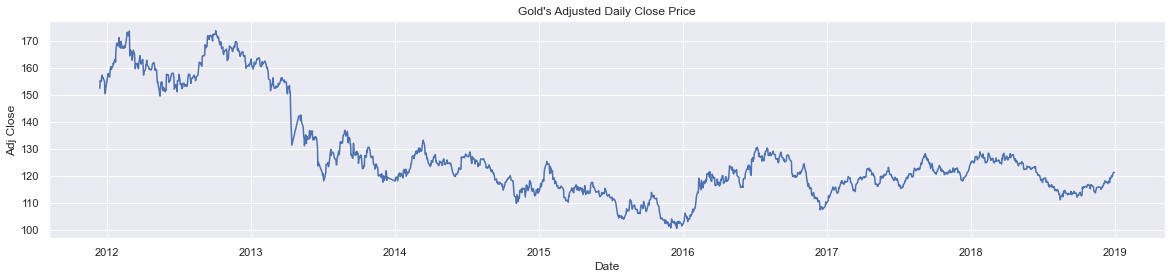

In [105]:
# Adjusted Close with Time Series
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Adj Close", data=data).set(title="Gold's Adjusted Daily Close Price")

## Identification des outliers

In [47]:
c1 = df.select_dtypes(include=['float'])
c1.shape

(1718, 58)

In [50]:
c1.head()

Open        High         Low       Close   Adj Close     SP_open  \
0  154.740005  154.949997  151.710007  152.330002  152.330002  123.029999   
1  154.309998  155.369995  153.899994  155.229996  155.229996  122.230003   
2  155.479996  155.860001  154.360001  154.869995  154.869995  122.059998   
3  156.820007  157.429993  156.580002  156.979996  156.979996  122.180000   
4  156.979996  157.529999  156.130005  157.160004  157.160004  123.930000   

      SP_high      SP_low    SP_close  SP_Ajclose      DJ_open      DJ_high  \
0  123.199997  121.989998  122.180000  105.441238  11825.29004  11967.83984   
1  122.949997  121.300003  121.589996  105.597549  11870.25000  11968.17969   
2  122.320000  120.029999  120.290001  104.468536  11866.54004  11925.87988   
3  124.139999  120.370003  123.930000  107.629784  11769.20996  12117.12988   
4  124.360001  122.750000  124.169998  107.838242  12103.58008  12119.70020   

        DJ_low     DJ_close   DJ_Ajclose    EG_open    EG_high     EG_low  \
0  11825.21973  11868.80957  11868.80957  74.550003  76.150002  72.150002   
1  11819.30957  11866.38965  11866.38965  73.599998  75.099998  73.349998   
2  11735.19043  11766.25977  11766.25977  69.099998  69.800003  64.199997   
3  11768.83008  12103.58008  12103.58008  66.449997  68.099998  66.000000   
4  11999.44043  12107.74023  12107.74023  67.099998  69.400002  66.900002   

    EG_close  EG_Ajclose  EU_Price  EU_open  EU_high  EU_low  OF_Price  \
0  72.900002   70.431755    1.3018   1.2982   1.3051  1.2957    105.09   
1  74.900002   72.364037    1.3035   1.3020   1.3087  1.2997    103.35   
2  64.699997   62.509384    1.2995   1.3043   1.3044  1.2981    103.64   
3  67.000000   64.731514    1.3079   1.3003   1.3133  1.2994    106.73   
4  68.500000   66.180725    1.3045   1.3079   1.3197  1.3024    107.71   

   OF_Open  OF_High  OF_Low  OS_Price  OS_Open  OS_High  OS_Low  USB_Price  \
0   104.88   106.50  104.88     93.42    94.91    96.00   93.33      1.911   
1   103.51   104.56  102.46     93.79    93.43    94.80   92.53      1.851   
2   103.63   104.57  102.37     94.09    93.77    94.43   92.55      1.810   
3   104.30   107.27  103.91     95.55    96.39    99.70   96.39      1.927   
4   107.15   108.17  106.16     99.01    97.54    99.26   96.81      1.970   

   USB_Open  USB_High  USB_Low  PLT_Price  PLT_Open  PLT_High  PLT_Low  \
0     1.911     1.911    1.911    1414.65   1420.30   1423.35  1376.85   
1     1.851     1.851    1.851    1420.25   1414.75   1431.75  1400.70   
2     1.810     1.810    1.810    1411.10   1422.65   1427.60  1404.60   
3     1.927     1.927    1.927    1434.75   1408.95   1436.55  1408.15   
4     1.970     1.970    1.970    1429.05   1434.40   1453.75  1417.65   

   PLD_Price  PLD_Open  PLD_High  PLD_Low  USDI_Price  USDI_Open  USDI_High  \
0     618.85    614.70    615.00   614.60      80.341     80.565     80.630   
1     623.65    622.60    623.45   622.30      80.249     80.175     80.395   
2     608.80    626.00    630.00   608.60      80.207     80.300     80.470   
3     626.65    622.45    622.45   622.45      80.273     80.890     80.940   
4     635.90    625.70    641.50   623.80      80.350     80.105     80.445   

   USDI_Low   GDX_Open   GDX_High    GDX_Low  GDX_Close  GDX_Adj Close  \
0    80.130  53.009998  53.139999  51.570000  51.680000      48.973877   
1    79.935  52.500000  53.180000  52.040001  52.680000      49.921513   
2    80.125  52.490002  52.549999  51.029999  51.169998      48.490578   
3    80.035  52.380001  53.250000  52.369999  52.990002      50.215282   
4    79.550  53.150002  53.430000  52.419998  52.959999      50.186852   

    USO_Open   USO_High    USO_Low  USO_Close  USO_Adj Close  
0  36.900002  36.939999  36.049999  36.130001      36.130001  
1  36.180000  36.500000  35.730000  36.270000      36.270000  
2  36.389999  36.450001  35.930000  36.200001      36.200001  
3  37.299999  37.610001  37.220001  37.560001      37.560001  
4  37.669998  

<AxesSubplot:>

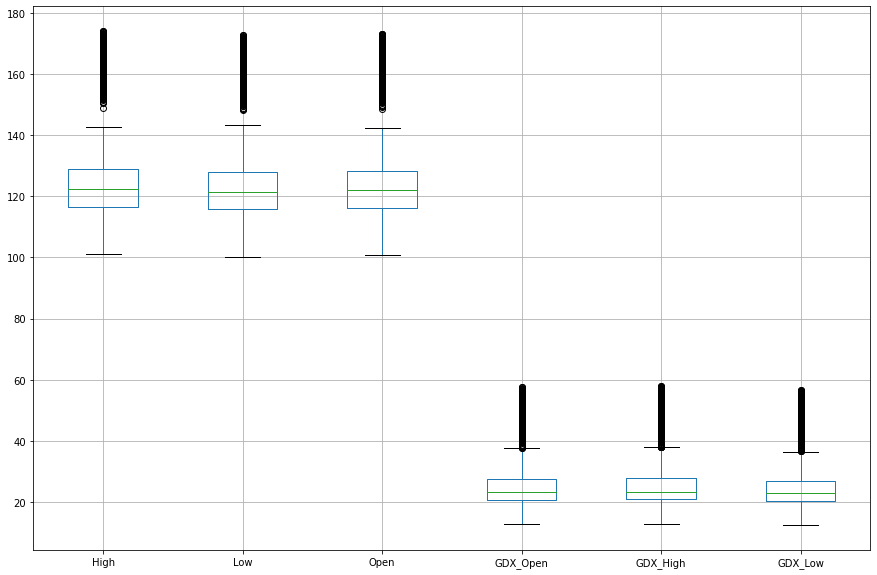

In [53]:
c1[['High','Low','Open','GDX_Open','GDX_High','GDX_Low']].boxplot(figsize=(15,10))